<a href="https://colab.research.google.com/github/ArunVignesh75/Machine-Learning/blob/main/image_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classification using CNN

The Task: EXPLORATION, ANALYSIS, MODELLING & OPERATIONALIZATION

The folder images inside data contains several different types of ID documents  taken in different conditions and backgrounds. The goal is to use the images stored in this folder and to design an algorithm that identifies the visibility of the card in the photo (FULL_VISIBILITY, PARTIAL_VISIBILITY, NO_VISIBILITY).



#Importing nescessary packages

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [25]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, models



In [2]:
df = pd.read_csv('gicsd_labels.csv')
df

,IMAGE_FILENAME,LABEL
0,GICSD_1_0_3.png,FULL_VISIBILITY
1,GICSD_1_0_13.png,FULL_VISIBILITY
2,GICSD_1_1_33.png,PARTIAL_VISIBILITY
3,GICSD_1_1_53.png,FULL_VISIBILITY
4,GICSD_1_2_73.png,FULL_VISIBILITY
...,...,...
795,GICSD_50_7_213.png,NO_VISIBILITY
796,GICSD_50_7_233.png,PARTIAL_VISIBILITY
797,GICSD_50_8_253.png,FULL_VISIBILITY
798,GICSD_50_9_273.png,FULL_VISIBILITY


In [3]:
df.dtypes

IMAGE_FILENAME    object
 LABEL            object
dtype: object

In [4]:
# Set the path to the image directory
image_dir = '/content/drive/MyDrive/Copy of images'

In [5]:
image_files = os.listdir(image_dir)  # List of all image file names in the directory

images = []  # List to store the loaded images

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)  # Path to the current image file
    image = cv2.imread(image_path)  # Load the image using OpenCV
    images.append(image)  # Add the loaded image to the list

print('Loaded', len(images), 'images.')


Loaded 800 images.


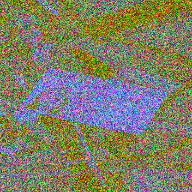

In [6]:
cv2_imshow(images[2])

In [7]:
# Define the path to the images
image_path = '/content/drive/MyDrive/Copy of images'

# Load the images into a list
data = []
for filename in os.listdir(image_path):
    if filename.endswith('.png'):
        image = cv2.imread(os.path.join(image_path, filename))
        data.append((image, filename))

# Load the labels from the CSV file
labels_df = pd.read_csv('gicsd_labels.csv')

# Create a dictionary to map filenames to labels
label_map = dict(zip(labels_df['IMAGE_FILENAME'], labels_df[' LABEL']))

# Assign the labels to the images based on their filenames
labeled_data = [(image, label_map[filename]) for image, filename in data]


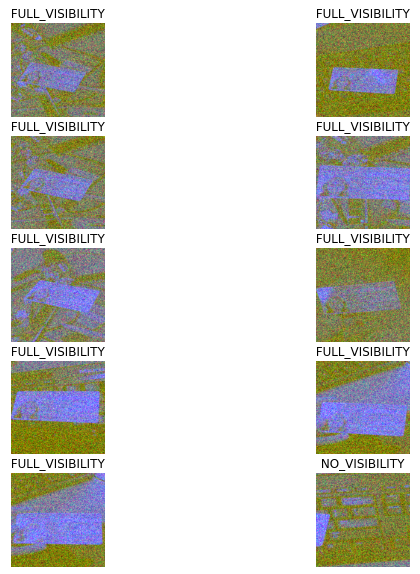

In [8]:
# Define a function to display the images and labels
def display_images(images, labels):
    fig = plt.figure(figsize=(10, 10))
    for i in range(10):
        ax = fig.add_subplot(5, 2, i+1)
        ax.imshow(images[i][:, :, ::-1])
        ax.set_title(labels[i])
        ax.axis('off')
    plt.show()

# Get the first 10 labeled images
labeled_data_10 = labeled_data[:10]

# Extract the images and labels
images = [t[0] for t in labeled_data_10]
labels = [t[1] for t in labeled_data_10]

# Display the images and labels
display_images(images, labels)


In [9]:
# Split the labeled data into features and labels
features = np.array([row[0] for row in labeled_data])
labels = np.array([row[1] for row in labeled_data])


In [37]:
import pandas as pd

# Load the labels from the CSV file
labels_df = pd.read_csv('gicsd_labels.csv')

# One-hot encode the labels
labels = pd.get_dummies(labels_df[' LABEL'].str.strip())

# Convert the labels to a numpy array
y = labels.values


In [11]:
# Loop through the features array and convert each image to grayscale
gray_features = []
for image in features:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_features.append(gray_image)


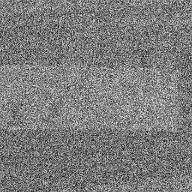

In [12]:
cv2_imshow(gray_features[10])

In [13]:
# denoised_features = []
# for img in gray_features:
#     output_adapthresh = cv2.adaptiveThreshold(img, 255.0, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, -20.0)
#     denoised_features.append(output_adapthresh)


#Mophological Features

In [14]:
morphology_features = []
for img in features:
    kernel = np.ones((3),np.uint8)
    clear_image = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=8)
    morphology_features.append(clear_image)

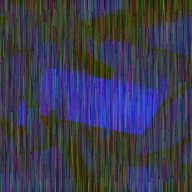

In [15]:
cv2_imshow(morphology_features[2])

In [16]:
morphology_features

[array([[[ 21,  60,  63],
         [ 22,  82,  50],
         [ 23,  25,  53],
         ...,
         [ 21,  85,  92],
         [ 21,  33,  32],
         [ 21,  52,  42]],
 
        [[ 21,  83,  63],
         [ 22,  82,  50],
         [ 23,  25,  53],
         ...,
         [ 21,  85,  92],
         [ 21,  33,  32],
         [ 21,  52,  42]],
 
        [[ 21,  83,  69],
         [ 22,  82,  50],
         [ 23,  25,  53],
         ...,
         [ 21,  85,  92],
         [ 21,  33,  32],
         [ 21,  59,  42]],
 
        ...,
 
        [[100,  72,  41],
         [ 99,  66,  72],
         [ 97,  89,  50],
         ...,
         [124,  16, 101],
         [123,  57,  71],
         [120,  89,  21]],
 
        [[100,  72,  41],
         [ 99,  66,  72],
         [ 97,  89,  50],
         ...,
         [124,  16, 101],
         [123,  57,  71],
         [120,  89,  21]],
 
        [[100,  72,  41],
         [ 99,  66,  72],
         [ 97,  89,  46],
         ...,
         [124,  16, 101],
  

In [17]:
# Apply median filter to the grayscale images
gray1_features = []
for img in morphology_features:
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray1_features.append(gray_image)


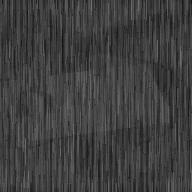

In [18]:
cv2_imshow(gray1_features[18])

In [19]:
# Convert the morphology features to a numpy array
morphology_features = np.array(morphology_features)

# Normalize the morphology features
morphology_features = morphology_features / 255.0


In [20]:
morphology_features

array([[[[0.08235294, 0.23529412, 0.24705882],
         [0.08627451, 0.32156863, 0.19607843],
         [0.09019608, 0.09803922, 0.20784314],
         ...,
         [0.08235294, 0.33333333, 0.36078431],
         [0.08235294, 0.12941176, 0.1254902 ],
         [0.08235294, 0.20392157, 0.16470588]],

        [[0.08235294, 0.3254902 , 0.24705882],
         [0.08627451, 0.32156863, 0.19607843],
         [0.09019608, 0.09803922, 0.20784314],
         ...,
         [0.08235294, 0.33333333, 0.36078431],
         [0.08235294, 0.12941176, 0.1254902 ],
         [0.08235294, 0.20392157, 0.16470588]],

        [[0.08235294, 0.3254902 , 0.27058824],
         [0.08627451, 0.32156863, 0.19607843],
         [0.09019608, 0.09803922, 0.20784314],
         ...,
         [0.08235294, 0.33333333, 0.36078431],
         [0.08235294, 0.12941176, 0.1254902 ],
         [0.08235294, 0.23137255, 0.16470588]],

        ...,

        [[0.39215686, 0.28235294, 0.16078431],
         [0.38823529, 0.25882353, 0.28235294]

#Spliting the Dataset

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(morphology_features, y, test_size=0.2, random_state=42)


#Initializing the Model

In [40]:

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(192, 192, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))




Epoch 1/10
20/20 [==============================] - 42s 2s/step - loss: 0.7131 - accuracy: 0.7469 - val_loss: 0.5134 - val_accuracy: 0.8438
Epoch 2/10
20/20 [==============================] - 40s 2s/step - loss: 0.6086 - accuracy: 0.7984 - val_loss: 0.5353 - val_accuracy: 0.8438
Epoch 3/10
20/20 [==============================] - 35s 2s/step - loss: 0.6044 - accuracy: 0.7984 - val_loss: 0.5236 - val_accuracy: 0.8438
Epoch 4/10
20/20 [==============================] - 37s 2s/step - loss: 0.6008 - accuracy: 0.7984 - val_loss: 0.5250 - val_accuracy: 0.8438
Epoch 5/10
20/20 [==============================] - 37s 2s/step - loss: 0.5883 - accuracy: 0.7984 - val_loss: 0.5300 - val_accuracy: 0.8438
Epoch 6/10
20/20 [==============================] - 37s 2s/step - loss: 0.6003 - accuracy: 0.7984 - val_loss: 0.5258 - val_accuracy: 0.8438
Epoch 7/10
20/20 [==============================] - 38s 2s/step - loss: 0.5703 - accuracy: 0.8000 - val_loss: 0.5467 - val_accuracy: 0.8438
Epoch 8/10
20/20 [==

#Evaluating the Model

In [41]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

5/5 [==============================] - 2s 437ms/step - loss: 0.5579 - accuracy: 0.8438
Test accuracy: 0.84375
